In [1]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# pretraitement
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re

# models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('dga-24000.csv')
data.head()

,Domain,Family
0,google.com,benign
1,facebook.com,benign
2,youtube.com,benign
3,twitter.com,benign
4,instagram.com,benign


In [ ]:
data.isnull().sum()

In [ ]:
np.unique(data['Family'])

In [7]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)

x_train = train_df['Domain'] 
y_train = train_df['Family']
x_test = test_df['Domain'] 
y_test = test_df['Family']
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((16800,), (16800,), (7200,), (7200,))

In [8]:
cv = CountVectorizer(tokenizer = lambda x : re.split('[.]', x))
x_train_vec = cv.fit_transform(x_train)
x_test_vec = cv.transform(x_test)

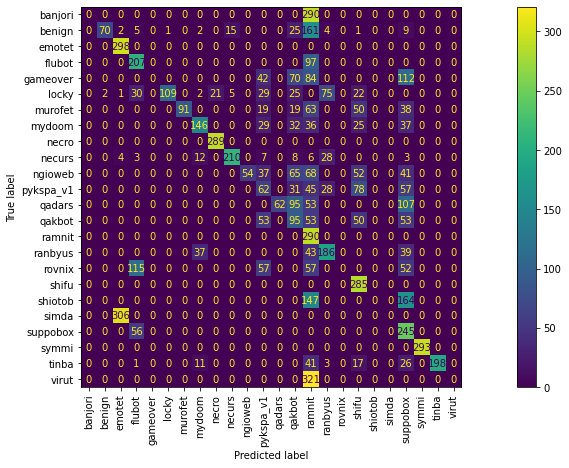

In [70]:
clf = LogisticRegression(max_iter= 200)
clf.fit(x_train_vec, y_train)
y_pred =clf.predict(x_test_vec)
accuracy_score(y_pred, y_test)


fig, ax = plt.subplots(figsize=(20, 7))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels= np.unique(data['Family']))
disp.plot(xticks_rotation='vertical', ax = ax)

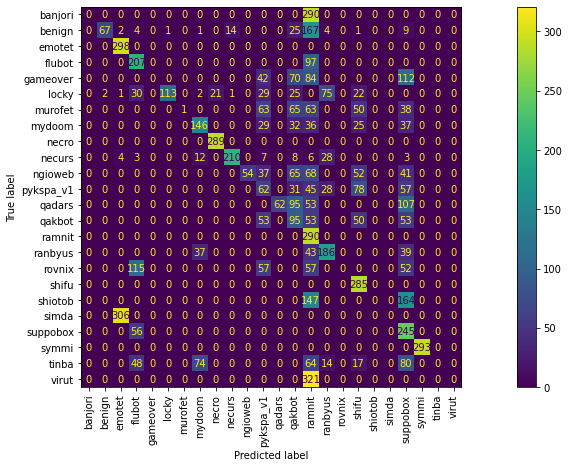

In [71]:
clf = RandomForestClassifier(max_depth= 100, random_state=42)
clf.fit(x_train_vec, y_train)
y_pred =clf.predict(x_test_vec)
accuracy_score(y_pred, y_test)


fig, ax = plt.subplots(figsize=(20, 7))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels= np.unique(data['Family']))
disp.plot(xticks_rotation='vertical', ax = ax)

In [ ]:
clf = MLPClassifier(max_iter= 300, random_state=42)
clf.fit(x_train_vec, y_train)
y_pred =clf.predict(x_test_vec)
accuracy_score(y_pred, y_test)


fig, ax = plt.subplots(figsize=(20, 7))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels= np.unique(data['Family']))
disp.plot(xticks_rotation='vertical', ax = ax)